In [1]:
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql

In [3]:
spark = SparkSession\
        .builder\
        .master('local[*]')\
        .appName('MvT')\
        .getOrCreate()

# Traditional POS Distributions

In [3]:
f = open('/spring2021/project1/comparison/Charles Dickens - Cities.txt')

In [4]:
raw = f.read()

In [5]:
startin = raw.find(" ***") + 4

In [6]:
endin = raw.rfind("End of the Project Gutenberg")

In [7]:
raw = raw[startin:endin]

In [8]:
tokens = nltk.word_tokenize(raw)

In [9]:
text = nltk.Text(tokens)

In [10]:
words = [w.lower() for w in text]

In [11]:
len(words)

166848

In [28]:
vocab = sorted(set(words))

In [28]:
pos_words = nltk.pos_tag(text, tagset='universal')

In [29]:
pos_words

[('Produced', 'VERB'),
 ('by', 'ADP'),
 ('Judith', 'NOUN'),
 ('Boss', 'NOUN'),
 (',', '.'),
 ('and', 'CONJ'),
 ('David', 'NOUN'),
 ('Widger', 'NOUN'),
 ('A', 'NOUN'),
 ('TALE', 'NOUN'),
 ('OF', 'NOUN'),
 ('TWO', 'NOUN'),
 ('CITIES', 'NOUN'),
 ('A', 'NOUN'),
 ('STORY', 'NOUN'),
 ('OF', 'ADP'),
 ('THE', 'NOUN'),
 ('FRENCH', 'NOUN'),
 ('REVOLUTION', 'NOUN'),
 ('By', 'ADP'),
 ('Charles', 'NOUN'),
 ('Dickens', 'NOUN'),
 ('CONTENTS', 'NOUN'),
 ('Book', 'NOUN'),
 ('the', 'DET'),
 ('First', 'NOUN'),
 ('--', '.'),
 ('Recalled', 'VERB'),
 ('to', 'PRT'),
 ('Life', 'NOUN'),
 ('CHAPTER', 'NOUN'),
 ('I', 'PRON'),
 ('The', 'DET'),
 ('Period', 'NOUN'),
 ('CHAPTER', 'NOUN'),
 ('II', 'NOUN'),
 ('The', 'DET'),
 ('Mail', 'NOUN'),
 ('CHAPTER', 'NOUN'),
 ('III', 'NOUN'),
 ('The', 'DET'),
 ('Night', 'NOUN'),
 ('Shadows', 'NOUN'),
 ('CHAPTER', 'NOUN'),
 ('IV', 'NOUN'),
 ('The', 'DET'),
 ('Preparation', 'NOUN'),
 ('CHAPTER', 'NOUN'),
 ('V', 'NOUN'),
 ('The', 'DET'),
 ('Wine-shop', 'NOUN'),
 ('CHAPTER', 'NOUN')

In [30]:
tag_fd = nltk.FreqDist([tag for (word, tag) in pos_words])

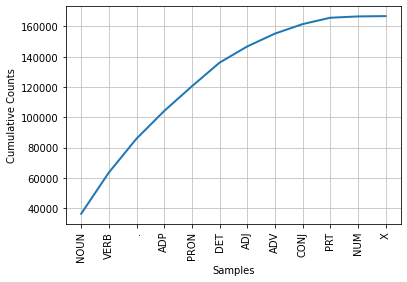

In [31]:
tag_fd.plot(cumulative=True)

In [140]:
f1 = open('/spring2021/project1/comparison/Charles Dickens - Cities.txt')

In [141]:
f2 = open('/spring2021/project1/comparison/Conan Doyle - Sherlock.txt')

In [142]:
f3 = open('/spring2021/project1/comparison/Herman Melville - Moby.txt')

In [143]:
f4 = open('/spring2021/project1/comparison/Jane Austen - Pride.txt')

In [144]:
f5 = open('/spring2021/project1/comparison/Mary Shelley - Frankenstein.txt')

In [145]:
f6 = open('/spring2021/project1/comparison/Nathaniel Hawthorne - Scarlet.txt')

In [146]:
f7 = open('/spring2021/project1/comparison/Scott Fitzgerald - Gatsby.txt')

In [147]:
tradRaws = [f.read() for f in [f1, f2, f3, f4, f5, f6, f7]]

In [149]:
def createTradFD(raw):
    # Clean Raw
    startin = raw.find(" ***") + 4
    endin = raw.rfind("End of the Project Gutenberg")
    raw = raw[startin:endin]
    # tokenize
    tokens = nltk.word_tokenize(raw)
    text = nltk.Text(tokens)
    words = [w.lower() for w in text]
    pos_words = nltk.pos_tag(text, tagset='universal')
    # Create FD
    tag_fd = nltk.FreqDist([tag for (word, tag) in pos_words])
    counts = [tc for tc in tag_fd.items()]
    # Create Dict
    ctDict = dict()
    for c in counts:
        ctDict[c[0]] = c[1]
        
    return ctDict

In [150]:
tradFDs = [createTradFD(raw) for raw in tradRaws]

In [152]:
TradTotals = {}
for d in tradFDs:
    for key in list(d.keys()):
        if key in list(TradTotals.keys()):
            TradTotals[key] += d[key]
        else:
            TradTotals[key] = d[key]

In [153]:
TradTotals

{'VERB': 155790,
 'ADP': 104436,
 'NOUN': 206142,
 '.': 116806,
 'CONJ': 35240,
 'DET': 91306,
 'PRT': 24092,
 'PRON': 89909,
 'NUM': 5690,
 'ADV': 53841,
 'ADJ': 65790,
 'X': 1174}

In [167]:
totalTradPos = sum(TradTotals.values())

In [168]:
tradPosPer = {}
for key in list(TradTotals.keys()):
    tradPosPer[key] = TradTotals[key]/totalTradPos

In [169]:
tradPosPer

{'VERB': 0.16395219613224782,
 'ADP': 0.1099076420519124,
 'NOUN': 0.2169422531298147,
 '.': 0.12292573478030258,
 'CONJ': 0.037086304587588506,
 'DET': 0.09608973117691136,
 'PRT': 0.025354235247564763,
 'PRON': 0.09461953913636478,
 'NUM': 0.005988112176599847,
 'ADV': 0.056661853725889694,
 'ADJ': 0.06923688929674937,
 'X': 0.0012355085580541688}

In [174]:
tradPosPer['index'] = "Trad"

# Blog Text POS Distribution

In [6]:
blogDF = spark.read.csv('/spring2021/project1/blogtext.csv', header = True, inferSchema=True)

In [7]:
blogDF.show()

+-------+------+---+-----------------+--------+------------+--------------------+
|     id|gender|age|            topic|    sign|        date|                text|
+-------+------+---+-----------------+--------+------------+--------------------+
|2059027|  male| 15|          Student|     Leo| 14,May,2004|           Info h...|
|2059027|  male| 15|          Student|     Leo| 13,May,2004|           These ...|
|2059027|  male| 15|          Student|     Leo| 12,May,2004|           In het...|
|2059027|  male| 15|          Student|     Leo| 12,May,2004|           testin...|
|3581210|  male| 33|InvestmentBanking|Aquarius|11,June,2004|             Than...|
|3581210|  male| 33|InvestmentBanking|Aquarius|10,June,2004|             I ha...|
|3581210|  male| 33|InvestmentBanking|Aquarius|10,June,2004|             Some...|
|3581210|  male| 33|InvestmentBanking|Aquarius|10,June,2004|             If a...|
|3581210|  male| 33|InvestmentBanking|Aquarius|10,June,2004|             Take...|
|3581210|  male|

In [11]:
from pyspark.sql.functions import col
from pyspark import SparkContext

In [8]:
blogDF

In [14]:
sc = spark.sparkContext

In [16]:
blogRDD = blogDF.select('text').rdd

In [17]:
blogRDD.take(2)

[Row(text='           Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         '),
 Row(text='           These are the team members:   Drewes van der Laag           urlLink mail  Ruiyu Xie                     urlLink mail  Bryan Aaldering (me)          urlLink mail          ')]

In [62]:
samples = blogRDD.take(2)

In [69]:
one = samples[0]
two = samples[1]

In [70]:
one

Row(text='           Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         ')

In [71]:
two

Row(text='           These are the team members:   Drewes van der Laag           urlLink mail  Ruiyu Xie                     urlLink mail  Bryan Aaldering (me)          urlLink mail          ')

In [81]:
ctOne = toke(one)
ctTwo = toke(two)

In [82]:
ctOne

{'NOUN': 7,
 'VERB': 9,
 'ADJ': 3,
 'NUM': 3,
 '.': 5,
 'CONJ': 2,
 'ADP': 1,
 'ADV': 1,
 'PRT': 1,
 'PRON': 2}

In [89]:
redCounts(ctOne, ctTwo)

{'NOUN': 19,
 'VERB': 11,
 'ADJ': 6,
 'NUM': 3,
 '.': 8,
 'CONJ': 2,
 'ADP': 1,
 'ADV': 1,
 'PRT': 1,
 'PRON': 3,
 'DET': 2}

In [90]:
def toke(x):
    raw = x['text']
    tokens = nltk.wordpunct_tokenize(raw)
    text = nltk.Text(tokens)
    words = [w.lower() for w in text]
    tags = nltk.pos_tag(words, tagset='universal')
    tag_fd = nltk.FreqDist(tag for (word, tag) in tags)
    counts = [tc for tc in tag_fd.items()]
    ctDict = dict()
    for c in counts:
        ctDict[c[0]] = c[1]
    
    return ctDict

In [91]:
tokenRDD = blogRDD.map(toke)

In [92]:
tokenRDD.take(1)

[{'NOUN': 7,
  'VERB': 9,
  'ADJ': 3,
  'NUM': 3,
  '.': 5,
  'CONJ': 2,
  'ADP': 1,
  'ADV': 1,
  'PRT': 1,
  'PRON': 2}]

In [93]:
def redCounts(x,y):
    tot = {}
    for key in list(x.keys()):
        tot[key] = x[key]
    for key in list(y.keys()):
        if key in list(tot.keys()):
            tot[key] += y[key]
        else:
            tot[key] = y[key]
            
    return tot

In [94]:
final_counts = tokenRDD.reduce(redCounts)
final_counts

{'NOUN': 39330070,
 'VERB': 29176591,
 'ADJ': 13953190,
 'NUM': 2465709,
 '.': 21849779,
 'CONJ': 5440305,
 'ADP': 14813325,
 'ADV': 10662144,
 'PRT': 5875294,
 'PRON': 11544809,
 'DET': 12684892,
 'X': 458435}

<BarContainer object of 12 artists>

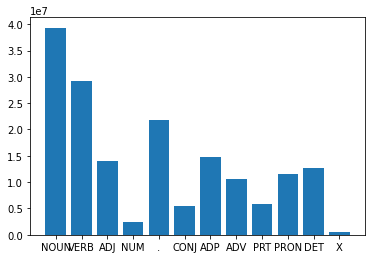

In [98]:
plt.bar(list(final_counts.keys()), list(final_counts.values()))

In [158]:
totalBlogPos = sum(final_counts.values())

In [159]:
blogPosPer = {}
for key in list(final_counts.keys()):
    blogPosPer[key] = final_counts[key]/totalBlogPos

In [162]:
blogPosPer

{'NOUN': 0.23375339113428872,
 'VERB': 0.17340744849902806,
 'ADJ': 0.08292905351150014,
 'NUM': 0.014654635506632353,
 '.': 0.12986145045723965,
 'CONJ': 0.03233377775719257,
 'ADP': 0.08804115916204414,
 'ADV': 0.06336912994973336,
 'PRT': 0.03491908090707542,
 'PRON': 0.06861513985984913,
 'DET': 0.0753910817136153,
 'X': 0.0027246515418011623}

In [173]:
blogPosPer['index'] = 'Blog'

# Hacker POS Distribution

In [100]:
hackDf = spark.read.csv('/spring2021/project1/hacker_news_sample.csv', header=True, inferSchema=True)

In [101]:
hackDf.show()

+--------------------+--------------------+--------------------+----+---------------+-----+----------+-------+--------+--------+-----------+-------+-------+-------------------+
|               title|                 url|                text|dead|             by|score|      time|   type|      id|  parent|descendants|ranking|deleted|          timestamp|
+--------------------+--------------------+--------------------+----+---------------+-----+----------+-------+--------+--------+-----------+-------+-------+-------------------+
|                null|                null|&gt;<i>which lead...|null|        coldtea| null|1390843873|comment| 7131680| 7127578|       null|   null|   null|2014-01-27 12:31:13|
|                null|                null|I would like to p...|null|         etanol| null|1319395600|comment| 3146879| 3145330|       null|   null|   null|2011-10-23 14:46:40|
|                null|                null|                null|null|           null| null|1456640816|comment|11190

In [102]:
hackRDD = hackDf.select('text').rdd

In [113]:
sample = hackRDD.take(3)

In [114]:
s1 = sample[0]
s2 = sample[1]
s3 = sample[2]

In [106]:
from bs4 import BeautifulSoup

In [117]:
bs = BeautifulSoup(s2['text'], 'lxml')

In [118]:
bs.get_text()

"I would like to point out some counter-examples:«Think of journalists. Many are losing their jobs. Newspapers are barely surviving. In the old days for every news event there were probably hundreds of journalists writing about the same story for their own local newspapers. Now because of the efficiency of the Internet and search engines a few journalists writing about it would suffice for the whole country. People would be able to find them. There is no reason why hundreds of newspapers should write and publish their own versions of the same story.»And yet you can still find incompetent people.  I've read so many inaccuracies grammar and typographic mistakes from information professionals (apparently) that makes me wonder if the price to pay for such efficiency is too high.  And I'm talking as a consumer information consumer.«Corporations are increasingly getting bigger (in terms of market caps) more global and more powerful yet they are getting smaller and smaller in terms of the num

In [131]:
def tokeHTML(x):
    if x['text'] == None:
        ctDict = {}
    else:    
        # Remove html
        bs = BeautifulSoup(x['text'], 'lxml')
        raw = bs.get_text()

        # Tokenize
        tokens = nltk.wordpunct_tokenize(raw)
        text = nltk.Text(tokens)
        words = [w.lower() for w in text]
        tags = nltk.pos_tag(words, tagset='universal')

        # Frequency Distribution
        tag_fd = nltk.FreqDist(tag for (word, tag) in tags)
        counts = [tc for tc in tag_fd.items()]
        ctDict = dict()
        for c in counts:
            ctDict[c[0]] = c[1]
    
    return ctDict

In [120]:
tokeHTML(s1)

{'NOUN': 54,
 'DET': 16,
 'VERB': 43,
 'PRON': 15,
 'PRT': 12,
 'ADV': 9,
 '.': 17,
 'ADP': 27,
 'ADJ': 15,
 'CONJ': 3}

In [121]:
tokeHTML(s2)

{'NOUN': 75,
 'VERB': 52,
 'PRT': 5,
 'DET': 27,
 '.': 24,
 'ADP': 32,
 'ADJ': 31,
 'PRON': 13,
 'ADV': 20,
 'CONJ': 11,
 'NUM': 1}

In [105]:
sample

[Row(text='&gt;<i>which leads me to say why are you using C to do X?</i><p>Because they know C it&#x27;s fast and it has lots of libs available. They might also dislike Java or CL.<p>Not every engineering decision is perfect lots of factors play in.<p>&gt;<i>Attempts to combine the best of C (speed) with the best of scripting languages (easy to do things fast without having to pay attention to what you are doing) in my opinion end up merely joining the worst of both worlds rather than the best of both worlds.</i><p>The &quot;pay attention&quot; things is to needless complexity (memory management etc). They only reason we put up with those things was to get speed. If we can get adequate speed without those nobody cares about them.<p>&gt;<i>Besides isn&#x27;t programming about being specific? Do you really want to code stuff without having to worry about the details?</i><p>No programming is about getting results. Nobody cares about the details in the level of programming language minutua

In [136]:
hackDistRdd = hackRDD.map(tokeHTML)

In [137]:
hackPosTot = hackDistRdd.reduce(redCounts)
hackPosTot

{'NOUN': 2738459,
 'DET': 974976,
 'VERB': 1897898,
 'PRON': 607548,
 'PRT': 345497,
 'ADV': 689537,
 '.': 1004406,
 'ADP': 1076001,
 'ADJ': 1025506,
 'CONJ': 303532,
 'NUM': 148104,
 'X': 15270}

In [163]:
totalHackPos = sum(hackPosTot.values())

In [164]:
hackPosPer = {}
for key in list(final_counts.keys()):
    hackPosPer[key] = hackPosTot[key]/totalHackPos

In [165]:
hackPosPer

{'NOUN': 0.2529349109343593,
 'VERB': 0.17529737037965465,
 'ADJ': 0.09471979269094447,
 'NUM': 0.01367947157471496,
 '.': 0.09277091318582317,
 'CONJ': 0.028035416774809467,
 'ADP': 0.09938371072938525,
 'ADV': 0.06368836622383076,
 'PRT': 0.03191147025501873,
 'PRON': 0.05611553770509186,
 'DET': 0.0900526419139881,
 'X': 0.0014103976323792567}

In [172]:
hackPosPer['index'] = 'Hack'

In [132]:
sample = hackRDD.take(5)

In [175]:
tradPosPer

{'VERB': 0.16395219613224782,
 'ADP': 0.1099076420519124,
 'NOUN': 0.2169422531298147,
 '.': 0.12292573478030258,
 'CONJ': 0.037086304587588506,
 'DET': 0.09608973117691136,
 'PRT': 0.025354235247564763,
 'PRON': 0.09461953913636478,
 'NUM': 0.005988112176599847,
 'ADV': 0.056661853725889694,
 'ADJ': 0.06923688929674937,
 'X': 0.0012355085580541688,
 'index': 'Trad'}

In [178]:
len(tradPosPer.keys())

13

In [176]:
blogPosPer

{'NOUN': 0.23375339113428872,
 'VERB': 0.17340744849902806,
 'ADJ': 0.08292905351150014,
 'NUM': 0.014654635506632353,
 '.': 0.12986145045723965,
 'CONJ': 0.03233377775719257,
 'ADP': 0.08804115916204414,
 'ADV': 0.06336912994973336,
 'PRT': 0.03491908090707542,
 'PRON': 0.06861513985984913,
 'DET': 0.0753910817136153,
 'X': 0.0027246515418011623,
 'index': 'Blog'}

In [179]:
len(blogPosPer.keys())

13

In [177]:
hackPosPer

{'NOUN': 0.2529349109343593,
 'VERB': 0.17529737037965465,
 'ADJ': 0.09471979269094447,
 'NUM': 0.01367947157471496,
 '.': 0.09277091318582317,
 'CONJ': 0.028035416774809467,
 'ADP': 0.09938371072938525,
 'ADV': 0.06368836622383076,
 'PRT': 0.03191147025501873,
 'PRON': 0.05611553770509186,
 'DET': 0.0900526419139881,
 'X': 0.0014103976323792567,
 'index': 'Hack'}

In [180]:
len(hackPosPer.keys())

13

In [171]:
import pandas as pd

In [181]:
df = pd.DataFrame([tradPosPer, hackPosPer, blogPosPer])

In [185]:
df.set_index('index', inplace=True)

In [191]:
dft = df.transpose()

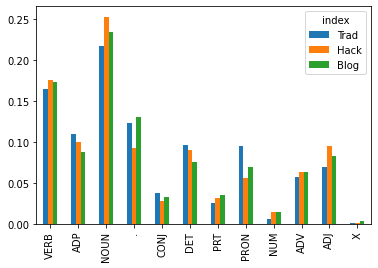

In [193]:
dft.plot(kind='bar')

In [195]:
df.to_csv('POS_percents.csv')

In [ ]:
dft.to_csv('POS_per_transpose.')

In [2]:
spark.stop()